# Scalability Metrics   
This notebook explores the following scalability metrics:
- Speed-Up
- Size-Up
- Scale-Up

## Speed-Up

In [7]:
import pandas as pd

num_cores = [1, 2, 4, 8, 12]

In [2]:
for i in range(10):
    for j in num_cores:
        !python metrics/code/scalability-globalDT.py {j} 100 speedup.csv

24/05/12 17:30:09 WARN Utils: Your hostname, Abels-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.247.203.189 instead (on interface en0)
24/05/12 17:30:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/12 17:30:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/12 17:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/05/12 17:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
24/05/12 17:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
24/05/12 17:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
24/05/12 17:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attemp

In [7]:
results = pd.read_csv('speedup.csv', names=['cores', 'pct', 'runtime'])
avg_results = results.groupby('cores').mean()
avg_results

,pct,runtime
cores,,
1,100.0,28.130909
2,100.0,19.074561
4,100.0,19.173238
8,100.0,19.250879
12,100.0,19.264750


In [8]:
def speed_up(results, runtime_col):
    return results[runtime_col].iloc[0] / results[runtime_col]

In [9]:
avg_results['speed-up'] = speed_up(avg_results, 'runtime')
avg_results[['runtime', 'speed-up']]

,runtime,speed-up
cores,,
1,28.130909,1.000000
2,19.074561,1.474787
4,19.173238,1.467197
8,19.250879,1.461279
12,19.264750,1.460227


In [37]:
avg_results.reset_index(inplace=True)
avg_results

,index,cores,pct,runtime,speed-up
0,0,1,100.0,28.130909,1.000000
1,1,2,100.0,19.074561,1.474787
2,2,4,100.0,19.173238,1.467197
3,3,8,100.0,19.250879,1.461279
4,4,12,100.0,19.264750,1.460227


<Axes: title={'center': 'Speed-Up'}, xlabel='Number of cores', ylabel='Speed-up'>

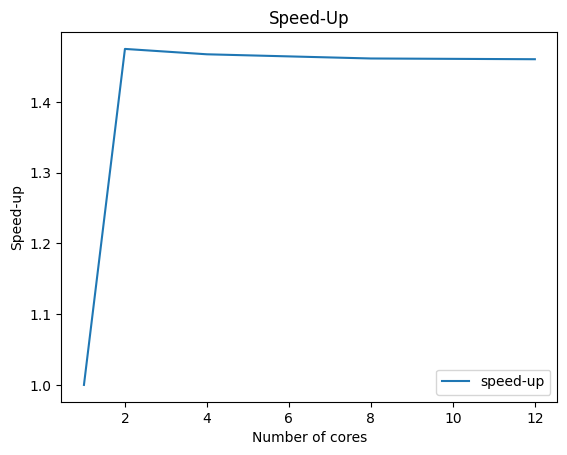

In [38]:
avg_results.plot(title="Speed-Up", x='cores', y='speed-up', xlabel='Number of cores', ylabel='Speed-up')

## Size-Up

In [1]:
sizes = [10, 20, 40, 80, 100]

from src.jobs.spark_etl import extract
from src.utils.spark import initSparkSession

sparkSession = initSparkSession()

df = extract(sparkSession)

24/05/12 18:34:12 WARN Utils: Your hostname, Abels-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.247.203.189 instead (on interface en0)
24/05/12 18:34:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/12 18:34:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/12 18:34:13 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/05/12 18:34:13 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
24/05/12 18:34:13 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
24/05/12 18:34:13 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
24/05/12 18:34:13 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attemp

In [5]:
full = df.limit(10000).toPandas()
for fraction in sizes[:-1]:
    full.sample(frac=fraction/100).to_csv(f"data/politics-{fraction}.csv", index=False)

In [10]:
for i in range(10):
    for fraction in sizes:
        !python metrics/code/scalability-globalDT.py 8 {fraction} sizeup.csv

24/05/12 18:44:02 WARN Utils: Your hostname, Abels-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.247.203.189 instead (on interface en0)
24/05/12 18:44:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/12 18:44:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/12 18:44:02 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/05/12 18:44:02 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
24/05/12 18:44:02 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
24/05/12 18:44:02 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
24/05/12 18:44:02 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attemp

In [11]:
results2 = pd.read_csv('sizeup.csv', names=['cores', 'pct', 'runtime'])
avg_results2 = results2.groupby('pct').mean()
avg_results2

,cores,runtime
pct,,
10,8.0,19.473109
20,8.0,19.086991
40,8.0,19.518052
80,8.0,19.207455
100,8.0,19.048713


In [12]:
def size_up(results, runtime_col):
    return results[runtime_col] / results[runtime_col].iloc[0]

In [13]:
avg_results2['size-up'] = size_up(avg_results2, 'runtime')
avg_results2[['runtime', 'size-up']]

,runtime,size-up
pct,,
10,19.473109,1.000000
20,19.086991,0.980172
40,19.518052,1.002308
80,19.207455,0.986358
100,19.048713,0.978206


In [21]:
avg_results2['pct'] = avg_results2.index
avg_results2

,cores,runtime,size-up,pct
pct,,,,
10,8.0,19.473109,1.000000,10
20,8.0,19.086991,0.980172,20
40,8.0,19.518052,1.002308,40
80,8.0,19.207455,0.986358,80
100,8.0,19.048713,0.978206,100


<Axes: title={'center': 'Size-Up'}, xlabel='Size of data(%)', ylabel='Size-up'>

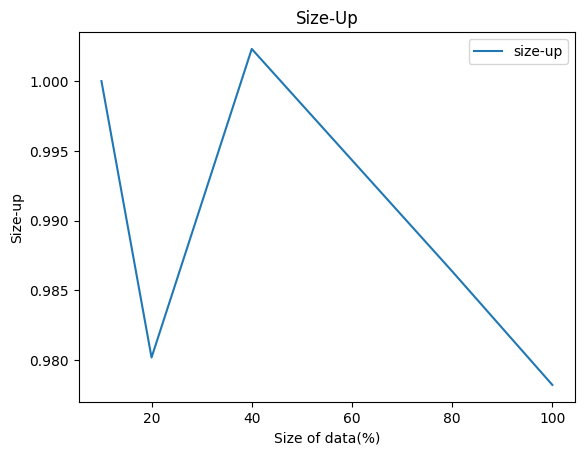

In [22]:
avg_results2.plot(title="Size-Up", x='pct', y='size-up', xlabel='Size of data(%)', ylabel='Size-up')

## Scale-Up

In [7]:
num_cores = [1, 2, 4, 8, 10]
sizes = [10, 20, 40, 80, 100]

In [23]:
for i in range(10):
    for j in range(len(num_cores)):
        !python metrics/code/scalability-globalDT.py {num_cores[j]} {sizes[j]} scaleup.csv

24/05/12 19:09:32 WARN Utils: Your hostname, Abels-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.247.203.189 instead (on interface en0)
24/05/12 19:09:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/12 19:09:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/12 19:09:32 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/05/12 19:09:32 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
24/05/12 19:09:32 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
24/05/12 19:09:32 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
24/05/12 19:09:32 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attemp

In [24]:
results3 = pd.read_csv('scaleup.csv', names=['cores', 'pct', 'runtime'])
avg_results3 = results3.groupby(['cores', 'pct']).mean()
avg_results3

,,runtime
cores,pct,
1,10,28.223492
2,20,19.511976
4,40,19.552527
8,80,19.598266
12,100,19.164134


In [25]:
def scale_up(results, runtime_col):
    return results[runtime_col].iloc[0] / results[runtime_col]

In [26]:
avg_results3['scale-up'] = scale_up(avg_results3, 'runtime')
avg_results3[['runtime', 'scale-up']]

,,runtime,scale-up
cores,pct,,
1,10,28.223492,1.000000
2,20,19.511976,1.446470
4,40,19.552527,1.443470
8,80,19.598266,1.440101
12,100,19.164134,1.472725


<Axes: title={'center': 'Scale-Up'}, xlabel='Number of cores', ylabel='Scale-up'>

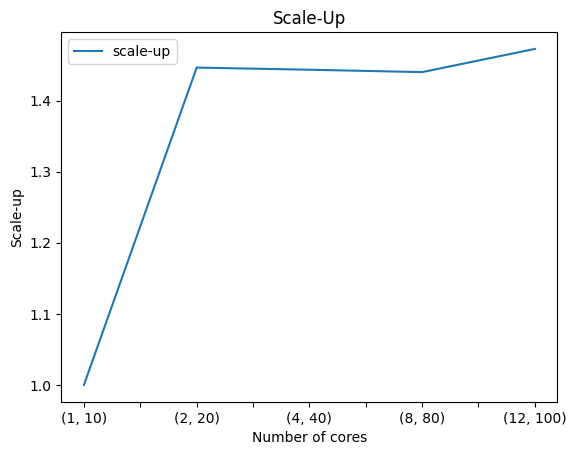

In [30]:
avg_results3['cores'] = avg_results3.index
avg_results3.plot(title="Scale-Up", x='cores', y='scale-up', xlabel='Number of cores', ylabel='Scale-up')